## The Race Around The Netherlands 2021
webscraping the leaderboard of the 2021 edition

For more detailed explanation of the code, see the 2018 file

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import regex as re
import datetime

In [2]:
#for scraping java
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located

In [3]:
#CUSTOMIZE URL
url = 'https://ratn2021.legendstracking.com/#'

#set that you want to run the chrome headless (behind the scenes, in the background)
chrome_options = Options()
chrome_options.add_argument("--headless")

#insert absolute path of chrome driver
driver = webdriver.Chrome('C:/Users/jetsa/chromedriver.exe', options = chrome_options)
driver.get(url)

# Find and click the right button, using the tab's id
button = driver.find_element(By.ID, "leaderboard-icon")
button.click()

In [4]:
#From here on you can start using BS4. I will now also see the html=code that became visible by clicking the button.
source = driver.page_source

#close the webdriver
driver.close()

<html>
 <head>
  <meta content="https://www.legendstracking.com/_lib/img/logo-facebook.png" property="og:image"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="Legends Tracking" property="og:title"/>
  <meta content="https://www.legendstracking.com" property="og:url"/>
  <meta content="Live gps tracking services for your event" property="og:description"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="../css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol.css" rel="stylesheet" type="text/css"/>
  <link href="../css/trackers1.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-sidebar.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-layerswitcher.css" rel="stylesheet" type="text/css"/>
  <link href="../css/flags.css" rel="stylesheet" type="text/css"/>
  <link href="../dev/css/j
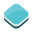

In [5]:
#make the soup
soup = BeautifulSoup(source, 'html')
print(soup.prettify())

In [6]:
#MIGHT NEED CUSTOMIZATION 
# check in the output below if you find the right table when you choose table 2.
#The table should contain information about the timings of the soloriders.
#this only works when put in a different cell.Maybe because you'll have to wait till the previous line is loaded?
table_solo = soup.find_all('table')[2]
table_solo

<table><tbody><tr><td colspan="6"></td><td>Start</td><td>Timing 1</td><td>Timing 2</td><td>Timing 3</td><td>Timing 4</td><td>Timing 5</td><td>Timing 6</td><td>Timing 7</td><td>Timing 8</td><td>Timing 9</td><td>Finish</td></tr><tr><td>1)</td><td style="vertical-align:top">10</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-nl" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars fa-fw"></i></td><td>Vlaskamp</td><td>Bas</td><td><b>Sat 11:00</b></td><td><span id="leaderboard_34912_1"></span></td><td><span id="leaderboard_34912_2"><b>13h44m</b></span></td><td><span id="leaderboard_34912_3"><b>16h33m</b></span></td><td><span id="leaderboard_34912_4"><b>24h01m</b></span></td><td><span id="leaderboard_34912_5"><b>30h50m</b></span></td><td><span id="leaderboard_34912_6"><b>49h27m</b></span></td><td><span id="leaderboard_34912_7"><b>53h30m</b></span></td><td><span id="leaderboard_34912_8"><b>68h44m</b></s

In [7]:
#find all the rows from this specific table
rows_solo = table_solo.findChildren('tr')

#convert each elements into a string to prevent an even more horrible mess
string_rows = []

for i in rows_solo:
    i = str(i)
    string_rows.append(i)
# print(string_rows[7]) #test

#convert the string+rows into a dataframe. Name the column "riders"
solo_riders = pd.DataFrame(string_rows)
solo_riders.columns=["riders"]
solo_riders.head()

#split the strings on </td> (this is removed)
solo_riders = solo_riders["riders"].str.split("</td>", expand = True)
solo_riders.head() #to check which columns you shoul delete in the next step

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"<tr><td colspan=""6"">",<td>Start,<td>Timing 1,<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top"">10","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Vlaskamp,<td>Bas,<td><b>Sat 11:00</b>,"<td><span id=""leaderboard_34912_1""></span>","<td><span id=""leaderboard_34912_2""><b>13h44m</...","<td><span id=""leaderboard_34912_3""><b>16h33m</...","<td><span id=""leaderboard_34912_4""><b>24h01m</...","<td><span id=""leaderboard_34912_5""><b>30h50m</...","<td><span id=""leaderboard_34912_6""><b>49h27m</...","<td><span id=""leaderboard_34912_7""><b>53h30m</...","<td><span id=""leaderboard_34912_8""><b>68h44m</...","<td><span id=""leaderboard_34912_9""><b>77h42m</...","<td><span id=""leaderboard_34912_10""><b>91h49m<...",</tr>
2,<tr><td>2),"<td style=""vertical-align:top"">24","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Cappuyns,<td>Sven,<td><b>Sat 7:45</b>,"<td><span id=""leaderboard_34921_1""></span>","<td><span id=""leaderboard_34921_2""><b>14h54m</...","<td><span id=""leaderboard_34921_3""><b>18h04m</...","<td><span id=""leaderboard_34921_4""><b>26h49m</...","<td><span id=""leaderboard_34921_5""><b>33h31m</...","<td><span id=""leaderboard_34921_6""><b>53h27m</...","<td><span id=""leaderboard_34921_7""><b>57h26m</...","<td><span id=""leaderboard_34921_8""><b>76h25m</...","<td><span id=""leaderboard_34921_9""><b>85h42m</...","<td><span id=""leaderboard_34921_10""><b>104h28m...",</tr>
3,<tr><td>3),"<td style=""vertical-align:top"">16","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Frans,<td>Richard,<td><b>Sat 7:15</b>,"<td><span id=""leaderboard_34914_1""></span>","<td><span id=""leaderboard_34914_2""><b>17h17m</...","<td><span id=""leaderboard_34914_3""><b>20h46m</...","<td><span id=""leaderboard_34914_4""><b>31h24m</...","<td><span id=""leaderboard_34914_5""><b>46h49m</...","<td><span id=""leaderboard_34914_6""><b>59h36m</...","<td><span id=""leaderboard_34914_7""><b>63h45m</...","<td><span id=""leaderboard_34914_8""><b>85h32m</...","<td><span id=""leaderboard_34914_9""><b>96h40m</...","<td><span id=""leaderboard_34914_10""><b>109h57m...",</tr>
4,<tr><td>4),"<td style=""vertical-align:top"">27","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Hesen,<td>Paul,<td><b>Fri 6:15</b>,"<td><span id=""leaderboard_34923_1""><b>05h55m</...","<td><span id=""leaderboard_34923_2""><b>18h52m</...","<td><span id=""leaderboard_34923_3""><b>26h31m</...","<td><span id=""leaderboard_34923_4""><b>35h00m</...","<td><span id=""leaderboard_34923_5""><b>43h02m</...","<td><span id=""leaderboard_34923_6""><b>59h16m</...","<td><span id=""leaderboard_34923_7""><b>62h54m</...","<td><span id=""leaderboard_34923_8""><b>84h31m</...","<td><span id=""leaderboard_34923_9""><b>100h00m<...","<td><span id=""leaderboard_34923_10""><b>112h35m...",</tr>


In [8]:
# MIGHT NEED CUSTOMIZATION - inspect the head and decide which columns to drop. In this (2019) case: colnr 1; 2; 17
solo_riders.drop(solo_riders.columns[[1,2,17]], axis=1, inplace = True)
# print(solo_riders.head()) # to check if the dropping went right

#rename columns
solo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

#check which rows are empty/useless and you should drop in the next cell. You'll need to see all rows (display.max_rows).
# In this case the rows you want to delete are nr 0; 45, 84
pd.set_option('display.max_rows', solo_riders.shape[0]+1)
solo_riders

,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,"<tr><td colspan=""6"">",<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Vlaskamp,<td>Bas,<td><b>Sat 11:00</b>,"<td><span id=""leaderboard_34912_1""></span>","<td><span id=""leaderboard_34912_2""><b>13h44m</...","<td><span id=""leaderboard_34912_3""><b>16h33m</...","<td><span id=""leaderboard_34912_4""><b>24h01m</...","<td><span id=""leaderboard_34912_5""><b>30h50m</...","<td><span id=""leaderboard_34912_6""><b>49h27m</...","<td><span id=""leaderboard_34912_7""><b>53h30m</...","<td><span id=""leaderboard_34912_8""><b>68h44m</...","<td><span id=""leaderboard_34912_9""><b>77h42m</...","<td><span id=""leaderboard_34912_10""><b>91h49m<..."
2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Cappuyns,<td>Sven,<td><b>Sat 7:45</b>,"<td><span id=""leaderboard_34921_1""></span>","<td><span id=""leaderboard_34921_2""><b>14h54m</...","<td><span id=""leaderboard_34921_3""><b>18h04m</...","<td><span id=""leaderboard_34921_4""><b>26h49m</...","<td><span id=""leaderboard_34921_5""><b>33h31m</...","<td><span id=""leaderboard_34921_6""><b>53h27m</...","<td><span id=""leaderboard_34921_7""><b>57h26m</...","<td><span id=""leaderboard_34921_8""><b>76h25m</...","<td><span id=""leaderboard_34921_9""><b>85h42m</...","<td><span id=""leaderboard_34921_10""><b>104h28m..."
3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Frans,<td>Richard,<td><b>Sat 7:15</b>,"<td><span id=""leaderboard_34914_1""></span>","<td><span id=""leaderboard_34914_2""><b>17h17m</...","<td><span id=""leaderboard_34914_3""><b>20h46m</...","<td><span id=""leaderboard_34914_4""><b>31h24m</...","<td><span id=""leaderboard_34914_5""><b>46h49m</...","<td><span id=""leaderboard_34914_6""><b>59h36m</...","<td><span id=""leaderboard_34914_7""><b>63h45m</...","<td><span id=""leaderboard_34914_8""><b>85h32m</...","<td><span id=""leaderboard_34914_9""><b>96h40m</...","<td><span id=""leaderboard_34914_10""><b>109h57m..."
4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Hesen,<td>Paul,<td><b>Fri 6:15</b>,"<td><span id=""leaderboard_34923_1""><b>05h55m</...","<td><span id=""leaderboard_34923_2""><b>18h52m</...","<td><span id=""leaderboard_34923_3""><b>26h31m</...","<td><span id=""leaderboard_34923_4""><b>35h00m</...","<td><span id=""leaderboard_34923_5""><b>43h02m</...","<td><span id=""leaderboard_34923_6""><b>59h16m</...","<td><span id=""leaderboard_34923_7""><b>62h54m</...","<td><span id=""leaderboard_34923_8""><b>84h31m</...","<td><span id=""leaderboard_34923_9""><b>100h00m<...","<td><span id=""leaderboard_34923_10""><b>112h35m..."
5,<tr><td>5),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Schreurs,<td>Jason,<td><b>Sat 6:30</b>,"<td><span id=""leaderboard_34937_1""><b>05h12m</...","<td><span id=""leaderboard_34937_2""><b>16h02m</...","<td><span id=""leaderboard_34937_3""><b>18h51m</...","<td><span id=""leaderboard_34937_4""><b>32h49m</...","<td><span id=""leaderboard_34937_5""><b>41h17m</...","<td><span id=""leaderboard_34937_6""><b>60h07m</...","<td><span id=""leaderboard_34937_7""><b>65h13m</...","<td><span id=""leaderboard_34937_8""><b>89h39m</...","<td><span id=""leaderboard_34937_9""><b>104h46m<...","<td><span id=""leaderboard_34937_10""><b>117h54m..."
6,<tr><td>6),"<td style=""vertical-align:top""><i aria-hidden=...",<td>van der Hoorn,<td>Roeland,<td><b>Sat 7:45</b>,"<td><span id=""leaderboard_34963_1""><b>05h09m</...","<td><span id=""leaderboard_34963_2""><b>16h38m</...","<td><span id=""leaderboard_34963_3""><b>23h17m</...","<td><span id=""leaderboard_34963_4""><b>33h44m</...","<td><span id=""leaderboard_34963_5""><b>48h52m</...","<td><span id=""leaderboard_34963_6""><b>72h10m</...","<td><span id=""leaderboard_34963_7"

In [9]:
#CUSTOMIZE: drop useless ROWS (basically the rows that have a None in LastName-column)
solo_riders = solo_riders.drop([0, 32, 61]).reset_index()
solo_riders.head()

#extract the gender
gender = []

for row in solo_riders["MarsVenus"]:
    if 'mars' in row:
        gender.append('male')
    if 'venus' in row:
        gender.append('female')

# Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
solo_riders["Gender"] = gender        
solo_riders = solo_riders.drop(solo_riders[["MarsVenus", "index"]], axis = 1)
solo_riders.head()

,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,<tr><td>1),<td>Vlaskamp,<td>Bas,<td><b>Sat 11:00</b>,"<td><span id=""leaderboard_34912_1""></span>","<td><span id=""leaderboard_34912_2""><b>13h44m</...","<td><span id=""leaderboard_34912_3""><b>16h33m</...","<td><span id=""leaderboard_34912_4""><b>24h01m</...","<td><span id=""leaderboard_34912_5""><b>30h50m</...","<td><span id=""leaderboard_34912_6""><b>49h27m</...","<td><span id=""leaderboard_34912_7""><b>53h30m</...","<td><span id=""leaderboard_34912_8""><b>68h44m</...","<td><span id=""leaderboard_34912_9""><b>77h42m</...","<td><span id=""leaderboard_34912_10""><b>91h49m<...",male
1,<tr><td>2),<td>Cappuyns,<td>Sven,<td><b>Sat 7:45</b>,"<td><span id=""leaderboard_34921_1""></span>","<td><span id=""leaderboard_34921_2""><b>14h54m</...","<td><span id=""leaderboard_34921_3""><b>18h04m</...","<td><span id=""leaderboard_34921_4""><b>26h49m</...","<td><span id=""leaderboard_34921_5""><b>33h31m</...","<td><span id=""leaderboard_34921_6""><b>53h27m</...","<td><span id=""leaderboard_34921_7""><b>57h26m</...","<td><span id=""leaderboard_34921_8""><b>76h25m</...","<td><span id=""leaderboard_34921_9""><b>85h42m</...","<td><span id=""leaderboard_34921_10""><b>104h28m...",male
2,<tr><td>3),<td>Frans,<td>Richard,<td><b>Sat 7:15</b>,"<td><span id=""leaderboard_34914_1""></span>","<td><span id=""leaderboard_34914_2""><b>17h17m</...","<td><span id=""leaderboard_34914_3""><b>20h46m</...","<td><span id=""leaderboard_34914_4""><b>31h24m</...","<td><span id=""leaderboard_34914_5""><b>46h49m</...","<td><span id=""leaderboard_34914_6""><b>59h36m</...","<td><span id=""leaderboard_34914_7""><b>63h45m</...","<td><span id=""leaderboard_34914_8""><b>85h32m</...","<td><span id=""leaderboard_34914_9""><b>96h40m</...","<td><span id=""leaderboard_34914_10""><b>109h57m...",male
3,<tr><td>4),<td>Hesen,<td>Paul,<td><b>Fri 6:15</b>,"<td><span id=""leaderboard_34923_1""><b>05h55m</...","<td><span id=""leaderboard_34923_2""><b>18h52m</...","<td><span id=""leaderboard_34923_3""><b>26h31m</...","<td><span id=""leaderboard_34923_4""><b>35h00m</...","<td><span id=""leaderboard_34923_5""><b>43h02m</...","<td><span id=""leaderboard_34923_6""><b>59h16m</...","<td><span id=""leaderboard_34923_7""><b>62h54m</...","<td><span id=""leaderboard_34923_8""><b>84h31m</...","<td><span id=""leaderboard_34923_9""><b>100h00m<...","<td><span id=""leaderboard_34923_10""><b>112h35m...",male
4,<tr><td>5),<td>Schreurs,<td>Jason,<td><b>Sat 6:30</b>,"<td><span id=""leaderboard_34937_1""><b>05h12m</...","<td><span id=""leaderboard_34937_2""><b>16h02m</...","<td><span id=""leaderboard_34937_3""><b>18h51m</...","<td><span id=""leaderboard_34937_4""><b>32h49m</...","<td><span id=""leaderboard_34937_5""><b>41h17m</...","<td><span id=""leaderboard_34937_6""><b>60h07m</...","<td><span id=""leaderboard_34937_7""><b>65h13m</...","<td><span id=""leaderboard_34937_8""><b>89h39m</...","<td><span id=""leaderboard_34937_9""><b>104h46m<...","<td><span id=""leaderboard_34937_10""><b>117h54m...",male


In [10]:
#CUSTOMIZE append columns with start date&time, and wether it's a solo or duo ride.
StartDate = 2021 #NOTE the riders started at different dates and times because of corona
solo_riders.insert(0, 'Solo or Duo', 'Solo')
solo_riders.insert(0, 'StartDate', StartDate)

solo_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2021,Solo,<tr><td>1),<td>Vlaskamp,<td>Bas,<td><b>Sat 11:00</b>,"<td><span id=""leaderboard_34912_1""></span>","<td><span id=""leaderboard_34912_2""><b>13h44m</...","<td><span id=""leaderboard_34912_3""><b>16h33m</...","<td><span id=""leaderboard_34912_4""><b>24h01m</...","<td><span id=""leaderboard_34912_5""><b>30h50m</...","<td><span id=""leaderboard_34912_6""><b>49h27m</...","<td><span id=""leaderboard_34912_7""><b>53h30m</...","<td><span id=""leaderboard_34912_8""><b>68h44m</...","<td><span id=""leaderboard_34912_9""><b>77h42m</...","<td><span id=""leaderboard_34912_10""><b>91h49m<...",male
1,2021,Solo,<tr><td>2),<td>Cappuyns,<td>Sven,<td><b>Sat 7:45</b>,"<td><span id=""leaderboard_34921_1""></span>","<td><span id=""leaderboard_34921_2""><b>14h54m</...","<td><span id=""leaderboard_34921_3""><b>18h04m</...","<td><span id=""leaderboard_34921_4""><b>26h49m</...","<td><span id=""leaderboard_34921_5""><b>33h31m</...","<td><span id=""leaderboard_34921_6""><b>53h27m</...","<td><span id=""leaderboard_34921_7""><b>57h26m</...","<td><span id=""leaderboard_34921_8""><b>76h25m</...","<td><span id=""leaderboard_34921_9""><b>85h42m</...","<td><span id=""leaderboard_34921_10""><b>104h28m...",male
2,2021,Solo,<tr><td>3),<td>Frans,<td>Richard,<td><b>Sat 7:15</b>,"<td><span id=""leaderboard_34914_1""></span>","<td><span id=""leaderboard_34914_2""><b>17h17m</...","<td><span id=""leaderboard_34914_3""><b>20h46m</...","<td><span id=""leaderboard_34914_4""><b>31h24m</...","<td><span id=""leaderboard_34914_5""><b>46h49m</...","<td><span id=""leaderboard_34914_6""><b>59h36m</...","<td><span id=""leaderboard_34914_7""><b>63h45m</...","<td><span id=""leaderboard_34914_8""><b>85h32m</...","<td><span id=""leaderboard_34914_9""><b>96h40m</...","<td><span id=""leaderboard_34914_10""><b>109h57m...",male
3,2021,Solo,<tr><td>4),<td>Hesen,<td>Paul,<td><b>Fri 6:15</b>,"<td><span id=""leaderboard_34923_1""><b>05h55m</...","<td><span id=""leaderboard_34923_2""><b>18h52m</...","<td><span id=""leaderboard_34923_3""><b>26h31m</...","<td><span id=""leaderboard_34923_4""><b>35h00m</...","<td><span id=""leaderboard_34923_5""><b>43h02m</...","<td><span id=""leaderboard_34923_6""><b>59h16m</...","<td><span id=""leaderboard_34923_7""><b>62h54m</...","<td><span id=""leaderboard_34923_8""><b>84h31m</...","<td><span id=""leaderboard_34923_9""><b>100h00m<...","<td><span id=""leaderboard_34923_10""><b>112h35m...",male
4,2021,Solo,<tr><td>5),<td>Schreurs,<td>Jason,<td><b>Sat 6:30</b>,"<td><span id=""leaderboard_34937_1""><b>05h12m</...","<td><span id=""leaderboard_34937_2""><b>16h02m</...","<td><span id=""leaderboard_34937_3""><b>18h51m</...","<td><span id=""leaderboard_34937_4""><b>32h49m</...","<td><span id=""leaderboard_34937_5""><b>41h17m</...","<td><span id=""leaderboard_34937_6""><b>60h07m</...","<td><span id=""leaderboard_34937_7""><b>65h13m</...","<td><span id=""leaderboard_34937_8""><b>89h39m</...","<td><span id=""leaderboard_34937_9""><b>104h46m<...","<td><span id=""leaderboard_34937_10""><b>117h54m...",male


### Duo-riders 2021

In [11]:
#grab the duo table
table_duo = soup.find_all('table')[3]
table_duo

<table><tbody><tr><td colspan="6"></td><td>Start</td><td>Timing 1</td><td>Timing 2</td><td>Timing 3</td><td>Timing 4</td><td>Timing 5</td><td>Timing 6</td><td>Timing 7</td><td>Timing 8</td><td>Timing 9</td><td>Finish</td></tr><tr><td>1)</td><td style="vertical-align:top">1509</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-nl" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars-double fa-fw"></i></td><td>Willems (DNF) - Timmermans</td><td></td><td><b>Fri 9:15</b></td><td><span id="leaderboard_34972_1"><b>07h05m</b></span></td><td><span id="leaderboard_34972_2"><b>29h45m</b></span></td><td><span id="leaderboard_34972_3"><b>33h33m</b></span></td><td><span id="leaderboard_34972_4"><b>54h09m</b></span></td><td><span id="leaderboard_34972_5"><b>72h18m</b></span></td><td><span id="leaderboard_34972_6"><b>122h19m</b></span></td><td><span id="leaderboard_34972_7"><b>127h38m</b></span></td><td><span id=

In [12]:
#grab the rows
rows_duo = table_duo.findChildren('tr')

#convert each elements into a string to prevent an even more horrible mess
string_rows = []

for i in rows_duo:
    i = str(i)
    string_rows.append(i)
print(string_rows[1])

<tr><td>1)</td><td style="vertical-align:top">1509</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-nl" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars-double fa-fw"></i></td><td>Willems (DNF) - Timmermans</td><td></td><td><b>Fri 9:15</b></td><td><span id="leaderboard_34972_1"><b>07h05m</b></span></td><td><span id="leaderboard_34972_2"><b>29h45m</b></span></td><td><span id="leaderboard_34972_3"><b>33h33m</b></span></td><td><span id="leaderboard_34972_4"><b>54h09m</b></span></td><td><span id="leaderboard_34972_5"><b>72h18m</b></span></td><td><span id="leaderboard_34972_6"><b>122h19m</b></span></td><td><span id="leaderboard_34972_7"><b>127h38m</b></span></td><td><span id="leaderboard_34972_8"><b>154h50m</b></span></td><td><span id="leaderboard_34972_9"><b>173h50m</b></span></td><td><span id="leaderboard_34972_10"><b>194h47m</b></span></td></tr>


In [13]:
#convert the string+rows into a dataframe. Name the column "riders"
duo_riders = pd.DataFrame(string_rows)
duo_riders.columns=["riders"]
duo_riders.head()

#split the strings on </td>
duo_riders = duo_riders["riders"].str.split("</td>", expand = True)
duo_riders

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"<tr><td colspan=""6"">",<td>Start,<td>Timing 1,<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top"">1509","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Willems (DNF) - Timmermans,<td>,<td><b>Fri 9:15</b>,"<td><span id=""leaderboard_34972_1""><b>07h05m</...","<td><span id=""leaderboard_34972_2""><b>29h45m</...","<td><span id=""leaderboard_34972_3""><b>33h33m</...","<td><span id=""leaderboard_34972_4""><b>54h09m</...","<td><span id=""leaderboard_34972_5""><b>72h18m</...","<td><span id=""leaderboard_34972_6""><b>122h19m<...","<td><span id=""leaderboard_34972_7""><b>127h38m<...","<td><span id=""leaderboard_34972_8""><b>154h50m<...","<td><span id=""leaderboard_34972_9""><b>173h50m<...","<td><span id=""leaderboard_34972_10""><b>194h47m...",</tr>
2,<tr><td>2),"<td style=""vertical-align:top"">4104","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>van Rijswijk - van den Broek,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34969_1""><b>07h15m</...","<td><span id=""leaderboard_34969_2""><b>32h01m</...","<td><span id=""leaderboard_34969_3""><b>35h40m</...","<td><span id=""leaderboard_34969_4""><b>56h27m</...","<td><span id=""leaderboard_34969_5""><b>77h03m</...","<td><span id=""leaderboard_34969_6""><b>121h25m<...","<td><span id=""leaderboard_34969_7""><b>128h12m<...","<td><span id=""leaderboard_34969_8""><b>173h24m<...","<td><span id=""leaderboard_34969_9""><b>195h40m<...","<td><span id=""leaderboard_34969_10""><b>223h15m...",</tr>
3,"<tr><td colspan=""8""><b>DNF</b>",</tr>,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,<tr><td>,"<td style=""vertical-align:top"">6886","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Cullen - Driedonks,<td>,<td><b>Sat 6:15</b>,"<td><span id=""leaderboard_34984_1""><b>06h25m</...","<td><span id=""leaderboard_34984_2""><b>18h44m</...","<td><span id=""leaderboard_34984_3""><b>22h02m</...","<td><span id=""leaderboard_34984_4""><b>36h31m</...","<td><span id=""leaderboard_34984_5""></span>","<td><span id=""leaderboard_34984_6""></span>","<td><span id=""leaderboard_34984_7""></span>","<td><span id=""leaderboard_34984_8""></span>","<td><span id=""leaderboard_34984_9""></span>","<td><span id=""leaderboard_34984_10""><b>57h27m<...",</tr>
5,<tr><td>,"<td style=""vertical-align:top"">65111","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Harder - Joosten,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34981_1""><b>07h02m</...","<td><span id=""leaderboard_34981_2""><b>27h38m</...","<td><span id=""leaderboard_34981_3""><b>31h48m</...","<td><span id=""leaderboard_34981_4""><b>51h44m</...","<td><span id=""leaderboard_34981_5""><b>61h42m</...","<td><span id=""leaderboard_34981_6""></span>","<td><span id=""leaderboard_34981_7""></span>","<td><span id=""leaderboard_34981_8""></span>","<td><span id=""leaderboard_34981_9""></span>","<td><span id=""leaderboard_34981_10""></span>",</tr>
6,<tr><td>,"<td style=""vertical-align:top"">7311","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Bisschops - Wiegel,<td>,<td><b>Fri 6:30</b>,"<td><span id=""leaderboard_34975_1""><b>07h23m</...","<td><span id=""leaderboard_34975_2""><b>29h09m</...","<td><span id=""leaderboard_34975_3""><b>33h30m</...","<td><span id=""leaderboard_34975_4""><b>51h55m</...","<td><span id=""leaderboard_34975_5""><b>62h43m</...","<td><span id=""leaderboard_34975_6""></span>","<td><span id=""leaderboard_34975_7""></span>","<td><span id=""leaderboard_34975_8""></span>","<td><span id=""leaderboard_34975_9""></span>","<

In [14]:
# CUSTOMIZE drop useless columns: colnr 1; 2; 17
duo_riders = duo_riders.drop(duo_riders.columns[[1,2,17]], axis=1)
duo_riders

#rename columns
duo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

#check which rows are empty/useless and you should drop in the next cell. 
duo_riders

,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,"<tr><td colspan=""6"">",<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Willems (DNF) - Timmermans,<td>,<td><b>Fri 9:15</b>,"<td><span id=""leaderboard_34972_1""><b>07h05m</...","<td><span id=""leaderboard_34972_2""><b>29h45m</...","<td><span id=""leaderboard_34972_3""><b>33h33m</...","<td><span id=""leaderboard_34972_4""><b>54h09m</...","<td><span id=""leaderboard_34972_5""><b>72h18m</...","<td><span id=""leaderboard_34972_6""><b>122h19m<...","<td><span id=""leaderboard_34972_7""><b>127h38m<...","<td><span id=""leaderboard_34972_8""><b>154h50m<...","<td><span id=""leaderboard_34972_9""><b>173h50m<...","<td><span id=""leaderboard_34972_10""><b>194h47m..."
2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>van Rijswijk - van den Broek,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34969_1""><b>07h15m</...","<td><span id=""leaderboard_34969_2""><b>32h01m</...","<td><span id=""leaderboard_34969_3""><b>35h40m</...","<td><span id=""leaderboard_34969_4""><b>56h27m</...","<td><span id=""leaderboard_34969_5""><b>77h03m</...","<td><span id=""leaderboard_34969_6""><b>121h25m<...","<td><span id=""leaderboard_34969_7""><b>128h12m<...","<td><span id=""leaderboard_34969_8""><b>173h24m<...","<td><span id=""leaderboard_34969_9""><b>195h40m<...","<td><span id=""leaderboard_34969_10""><b>223h15m..."
3,"<tr><td colspan=""8""><b>DNF</b>",None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Cullen - Driedonks,<td>,<td><b>Sat 6:15</b>,"<td><span id=""leaderboard_34984_1""><b>06h25m</...","<td><span id=""leaderboard_34984_2""><b>18h44m</...","<td><span id=""leaderboard_34984_3""><b>22h02m</...","<td><span id=""leaderboard_34984_4""><b>36h31m</...","<td><span id=""leaderboard_34984_5""></span>","<td><span id=""leaderboard_34984_6""></span>","<td><span id=""leaderboard_34984_7""></span>","<td><span id=""leaderboard_34984_8""></span>","<td><span id=""leaderboard_34984_9""></span>","<td><span id=""leaderboard_34984_10""><b>57h27m<..."
5,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Harder - Joosten,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34981_1""><b>07h02m</...","<td><span id=""leaderboard_34981_2""><b>27h38m</...","<td><span id=""leaderboard_34981_3""><b>31h48m</...","<td><span id=""leaderboard_34981_4""><b>51h44m</...","<td><span id=""leaderboard_34981_5""><b>61h42m</...","<td><span id=""leaderboard_34981_6""></span>","<td><span id=""leaderboard_34981_7""></span>","<td><span id=""leaderboard_34981_8""></span>","<td><span id=""leaderboard_34981_9""></span>","<td><span id=""leaderboard_34981_10""></span>"
6,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Bisschops - Wiegel,<td>,<td><b>Fri 6:30</b>,"<td><span id=""leaderboard_34975_1""><b>07h23m</...","<td><span id=""leaderboard_34975_2""><b>29h09m</...","<td><span id=""leaderboard_34975_3""><b>33h30m</...","<td><span id=""leaderboard_34975_4""><b>51h55m</...","<td><span id=""leaderboard_34975_5""><b>62h43m</...","<td><span id=""leaderboard_34975_6""></span>","<td><span id=""leaderboard_34975_7""></span>","<td><span id=""leaderboard_34975_8""></span>","<td><span id=""leaderboard_34975_9""></span>","<td><span id=""leaderboard_34975_10""></span>"
7,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Verweij - Hoskam,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34978_1""><b>06h12m</...","<td><span id=""leaderboard_34978_2""><b>28h23m</...","<td><span id=""leaderboard_34978_3""><b>31h23m</...","<td><span id=""leaderboard_34978_4""><b>50h59m</...","<td><span id=""leaderboard_34978_5""></span>","<td><span id=""leaderboard_34978_6"

In [15]:
#CUSTOMIZE: drop useless ROWS
duo_riders = duo_riders.drop([0, 3]).reset_index()
duo_riders.head()

,index,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Willems (DNF) - Timmermans,<td>,<td><b>Fri 9:15</b>,"<td><span id=""leaderboard_34972_1""><b>07h05m</...","<td><span id=""leaderboard_34972_2""><b>29h45m</...","<td><span id=""leaderboard_34972_3""><b>33h33m</...","<td><span id=""leaderboard_34972_4""><b>54h09m</...","<td><span id=""leaderboard_34972_5""><b>72h18m</...","<td><span id=""leaderboard_34972_6""><b>122h19m<...","<td><span id=""leaderboard_34972_7""><b>127h38m<...","<td><span id=""leaderboard_34972_8""><b>154h50m<...","<td><span id=""leaderboard_34972_9""><b>173h50m<...","<td><span id=""leaderboard_34972_10""><b>194h47m..."
1,2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>van Rijswijk - van den Broek,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34969_1""><b>07h15m</...","<td><span id=""leaderboard_34969_2""><b>32h01m</...","<td><span id=""leaderboard_34969_3""><b>35h40m</...","<td><span id=""leaderboard_34969_4""><b>56h27m</...","<td><span id=""leaderboard_34969_5""><b>77h03m</...","<td><span id=""leaderboard_34969_6""><b>121h25m<...","<td><span id=""leaderboard_34969_7""><b>128h12m<...","<td><span id=""leaderboard_34969_8""><b>173h24m<...","<td><span id=""leaderboard_34969_9""><b>195h40m<...","<td><span id=""leaderboard_34969_10""><b>223h15m..."
2,4,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Cullen - Driedonks,<td>,<td><b>Sat 6:15</b>,"<td><span id=""leaderboard_34984_1""><b>06h25m</...","<td><span id=""leaderboard_34984_2""><b>18h44m</...","<td><span id=""leaderboard_34984_3""><b>22h02m</...","<td><span id=""leaderboard_34984_4""><b>36h31m</...","<td><span id=""leaderboard_34984_5""></span>","<td><span id=""leaderboard_34984_6""></span>","<td><span id=""leaderboard_34984_7""></span>","<td><span id=""leaderboard_34984_8""></span>","<td><span id=""leaderboard_34984_9""></span>","<td><span id=""leaderboard_34984_10""><b>57h27m<..."
3,5,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Harder - Joosten,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34981_1""><b>07h02m</...","<td><span id=""leaderboard_34981_2""><b>27h38m</...","<td><span id=""leaderboard_34981_3""><b>31h48m</...","<td><span id=""leaderboard_34981_4""><b>51h44m</...","<td><span id=""leaderboard_34981_5""><b>61h42m</...","<td><span id=""leaderboard_34981_6""></span>","<td><span id=""leaderboard_34981_7""></span>","<td><span id=""leaderboard_34981_8""></span>","<td><span id=""leaderboard_34981_9""></span>","<td><span id=""leaderboard_34981_10""></span>"
4,6,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Bisschops - Wiegel,<td>,<td><b>Fri 6:30</b>,"<td><span id=""leaderboard_34975_1""><b>07h23m</...","<td><span id=""leaderboard_34975_2""><b>29h09m</...","<td><span id=""leaderboard_34975_3""><b>33h30m</...","<td><span id=""leaderboard_34975_4""><b>51h55m</...","<td><span id=""leaderboard_34975_5""><b>62h43m</...","<td><span id=""leaderboard_34975_6""></span>","<td><span id=""leaderboard_34975_7""></span>","<td><span id=""leaderboard_34975_8""></span>","<td><span id=""leaderboard_34975_9""></span>","<td><span id=""leaderboard_34975_10""></span>"


In [16]:
#extract the gender
gender = []

for row in duo_riders["MarsVenus"]:
    if 'mars-double' in row:
        gender.append('male')
    if 'venus-double' in row:
        gender.append('female')
    if 'venus-mars' in row:
        gender.append('mixed')

#Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
duo_riders["Gender"] = gender
duo_riders = duo_riders.drop(duo_riders[["MarsVenus", "index"]], axis = 1)
duo_riders

,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,<tr><td>1),<td>Willems (DNF) - Timmermans,<td>,<td><b>Fri 9:15</b>,"<td><span id=""leaderboard_34972_1""><b>07h05m</...","<td><span id=""leaderboard_34972_2""><b>29h45m</...","<td><span id=""leaderboard_34972_3""><b>33h33m</...","<td><span id=""leaderboard_34972_4""><b>54h09m</...","<td><span id=""leaderboard_34972_5""><b>72h18m</...","<td><span id=""leaderboard_34972_6""><b>122h19m<...","<td><span id=""leaderboard_34972_7""><b>127h38m<...","<td><span id=""leaderboard_34972_8""><b>154h50m<...","<td><span id=""leaderboard_34972_9""><b>173h50m<...","<td><span id=""leaderboard_34972_10""><b>194h47m...",male
1,<tr><td>2),<td>van Rijswijk - van den Broek,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34969_1""><b>07h15m</...","<td><span id=""leaderboard_34969_2""><b>32h01m</...","<td><span id=""leaderboard_34969_3""><b>35h40m</...","<td><span id=""leaderboard_34969_4""><b>56h27m</...","<td><span id=""leaderboard_34969_5""><b>77h03m</...","<td><span id=""leaderboard_34969_6""><b>121h25m<...","<td><span id=""leaderboard_34969_7""><b>128h12m<...","<td><span id=""leaderboard_34969_8""><b>173h24m<...","<td><span id=""leaderboard_34969_9""><b>195h40m<...","<td><span id=""leaderboard_34969_10""><b>223h15m...",mixed
2,<tr><td>,<td>Cullen - Driedonks,<td>,<td><b>Sat 6:15</b>,"<td><span id=""leaderboard_34984_1""><b>06h25m</...","<td><span id=""leaderboard_34984_2""><b>18h44m</...","<td><span id=""leaderboard_34984_3""><b>22h02m</...","<td><span id=""leaderboard_34984_4""><b>36h31m</...","<td><span id=""leaderboard_34984_5""></span>","<td><span id=""leaderboard_34984_6""></span>","<td><span id=""leaderboard_34984_7""></span>","<td><span id=""leaderboard_34984_8""></span>","<td><span id=""leaderboard_34984_9""></span>","<td><span id=""leaderboard_34984_10""><b>57h27m<...",male
3,<tr><td>,<td>Harder - Joosten,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34981_1""><b>07h02m</...","<td><span id=""leaderboard_34981_2""><b>27h38m</...","<td><span id=""leaderboard_34981_3""><b>31h48m</...","<td><span id=""leaderboard_34981_4""><b>51h44m</...","<td><span id=""leaderboard_34981_5""><b>61h42m</...","<td><span id=""leaderboard_34981_6""></span>","<td><span id=""leaderboard_34981_7""></span>","<td><span id=""leaderboard_34981_8""></span>","<td><span id=""leaderboard_34981_9""></span>","<td><span id=""leaderboard_34981_10""></span>",male
4,<tr><td>,<td>Bisschops - Wiegel,<td>,<td><b>Fri 6:30</b>,"<td><span id=""leaderboard_34975_1""><b>07h23m</...","<td><span id=""leaderboard_34975_2""><b>29h09m</...","<td><span id=""leaderboard_34975_3""><b>33h30m</...","<td><span id=""leaderboard_34975_4""><b>51h55m</...","<td><span id=""leaderboard_34975_5""><b>62h43m</...","<td><span id=""leaderboard_34975_6""></span>","<td><span id=""leaderboard_34975_7""></span>","<td><span id=""leaderboard_34975_8""></span>","<td><span id=""leaderboard_34975_9""></span>","<td><span id=""leaderboard_34975_10""></span>",mixed
5,<tr><td>,<td>Verweij - Hoskam,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34978_1""><b>06h12m</...","<td><span id=""leaderboard_34978_2""><b>28h23m</...","<td><span id=""leaderboard_34978_3""><b>31h23m</...","<td><span id=""leaderboard_34978_4""><b>50h59m</...","<td><span id=""leaderboard_34978_5""></span>","<td><span id=""leaderboard_34978_6""></span>","<td><span id=""leaderboard_34978_7""></span>","<td><span id=""leaderboard_34978_8""></span>","<td><span id=""leaderboard_34978_9""></span>","<td><span id=""leaderboard_34978_10""></span>",mixed


In [17]:
#CUSTOMIZE append columns with the startdate (line 1) and whether it a duo or solo ride (line 2)
StartDate = 2021 #NOTE in 2021 the riders started on different dates and times because of corona
duo_riders.insert(0, 'Solo or Duo', 'Duo')
duo_riders.insert(0, 'StartDate', StartDate)
duo_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2021,Duo,<tr><td>1),<td>Willems (DNF) - Timmermans,<td>,<td><b>Fri 9:15</b>,"<td><span id=""leaderboard_34972_1""><b>07h05m</...","<td><span id=""leaderboard_34972_2""><b>29h45m</...","<td><span id=""leaderboard_34972_3""><b>33h33m</...","<td><span id=""leaderboard_34972_4""><b>54h09m</...","<td><span id=""leaderboard_34972_5""><b>72h18m</...","<td><span id=""leaderboard_34972_6""><b>122h19m<...","<td><span id=""leaderboard_34972_7""><b>127h38m<...","<td><span id=""leaderboard_34972_8""><b>154h50m<...","<td><span id=""leaderboard_34972_9""><b>173h50m<...","<td><span id=""leaderboard_34972_10""><b>194h47m...",male
1,2021,Duo,<tr><td>2),<td>van Rijswijk - van den Broek,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34969_1""><b>07h15m</...","<td><span id=""leaderboard_34969_2""><b>32h01m</...","<td><span id=""leaderboard_34969_3""><b>35h40m</...","<td><span id=""leaderboard_34969_4""><b>56h27m</...","<td><span id=""leaderboard_34969_5""><b>77h03m</...","<td><span id=""leaderboard_34969_6""><b>121h25m<...","<td><span id=""leaderboard_34969_7""><b>128h12m<...","<td><span id=""leaderboard_34969_8""><b>173h24m<...","<td><span id=""leaderboard_34969_9""><b>195h40m<...","<td><span id=""leaderboard_34969_10""><b>223h15m...",mixed
2,2021,Duo,<tr><td>,<td>Cullen - Driedonks,<td>,<td><b>Sat 6:15</b>,"<td><span id=""leaderboard_34984_1""><b>06h25m</...","<td><span id=""leaderboard_34984_2""><b>18h44m</...","<td><span id=""leaderboard_34984_3""><b>22h02m</...","<td><span id=""leaderboard_34984_4""><b>36h31m</...","<td><span id=""leaderboard_34984_5""></span>","<td><span id=""leaderboard_34984_6""></span>","<td><span id=""leaderboard_34984_7""></span>","<td><span id=""leaderboard_34984_8""></span>","<td><span id=""leaderboard_34984_9""></span>","<td><span id=""leaderboard_34984_10""><b>57h27m<...",male
3,2021,Duo,<tr><td>,<td>Harder - Joosten,<td>,<td><b>Fri 8:15</b>,"<td><span id=""leaderboard_34981_1""><b>07h02m</...","<td><span id=""leaderboard_34981_2""><b>27h38m</...","<td><span id=""leaderboard_34981_3""><b>31h48m</...","<td><span id=""leaderboard_34981_4""><b>51h44m</...","<td><span id=""leaderboard_34981_5""><b>61h42m</...","<td><span id=""leaderboard_34981_6""></span>","<td><span id=""leaderboard_34981_7""></span>","<td><span id=""leaderboard_34981_8""></span>","<td><span id=""leaderboard_34981_9""></span>","<td><span id=""leaderboard_34981_10""></span>",male
4,2021,Duo,<tr><td>,<td>Bisschops - Wiegel,<td>,<td><b>Fri 6:30</b>,"<td><span id=""leaderboard_34975_1""><b>07h23m</...","<td><span id=""leaderboard_34975_2""><b>29h09m</...","<td><span id=""leaderboard_34975_3""><b>33h30m</...","<td><span id=""leaderboard_34975_4""><b>51h55m</...","<td><span id=""leaderboard_34975_5""><b>62h43m</...","<td><span id=""leaderboard_34975_6""></span>","<td><span id=""leaderboard_34975_7""></span>","<td><span id=""leaderboard_34975_8""></span>","<td><span id=""leaderboard_34975_9""></span>","<td><span id=""leaderboard_34975_10""></span>",mixed


In [18]:
# glue solo and duo-riders together
all_riders = pd.concat([solo_riders, duo_riders]).reset_index()
all_riders = all_riders.drop(all_riders.columns[0], axis=1)
pd.set_option('display.max_rows', all_riders.shape[0]+1)
all_riders

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2021,Solo,<tr><td>1),<td>Vlaskamp,<td>Bas,<td><b>Sat 11:00</b>,"<td><span id=""leaderboard_34912_1""></span>","<td><span id=""leaderboard_34912_2""><b>13h44m</...","<td><span id=""leaderboard_34912_3""><b>16h33m</...","<td><span id=""leaderboard_34912_4""><b>24h01m</...","<td><span id=""leaderboard_34912_5""><b>30h50m</...","<td><span id=""leaderboard_34912_6""><b>49h27m</...","<td><span id=""leaderboard_34912_7""><b>53h30m</...","<td><span id=""leaderboard_34912_8""><b>68h44m</...","<td><span id=""leaderboard_34912_9""><b>77h42m</...","<td><span id=""leaderboard_34912_10""><b>91h49m<...",male
1,2021,Solo,<tr><td>2),<td>Cappuyns,<td>Sven,<td><b>Sat 7:45</b>,"<td><span id=""leaderboard_34921_1""></span>","<td><span id=""leaderboard_34921_2""><b>14h54m</...","<td><span id=""leaderboard_34921_3""><b>18h04m</...","<td><span id=""leaderboard_34921_4""><b>26h49m</...","<td><span id=""leaderboard_34921_5""><b>33h31m</...","<td><span id=""leaderboard_34921_6""><b>53h27m</...","<td><span id=""leaderboard_34921_7""><b>57h26m</...","<td><span id=""leaderboard_34921_8""><b>76h25m</...","<td><span id=""leaderboard_34921_9""><b>85h42m</...","<td><span id=""leaderboard_34921_10""><b>104h28m...",male
2,2021,Solo,<tr><td>3),<td>Frans,<td>Richard,<td><b>Sat 7:15</b>,"<td><span id=""leaderboard_34914_1""></span>","<td><span id=""leaderboard_34914_2""><b>17h17m</...","<td><span id=""leaderboard_34914_3""><b>20h46m</...","<td><span id=""leaderboard_34914_4""><b>31h24m</...","<td><span id=""leaderboard_34914_5""><b>46h49m</...","<td><span id=""leaderboard_34914_6""><b>59h36m</...","<td><span id=""leaderboard_34914_7""><b>63h45m</...","<td><span id=""leaderboard_34914_8""><b>85h32m</...","<td><span id=""leaderboard_34914_9""><b>96h40m</...","<td><span id=""leaderboard_34914_10""><b>109h57m...",male
3,2021,Solo,<tr><td>4),<td>Hesen,<td>Paul,<td><b>Fri 6:15</b>,"<td><span id=""leaderboard_34923_1""><b>05h55m</...","<td><span id=""leaderboard_34923_2""><b>18h52m</...","<td><span id=""leaderboard_34923_3""><b>26h31m</...","<td><span id=""leaderboard_34923_4""><b>35h00m</...","<td><span id=""leaderboard_34923_5""><b>43h02m</...","<td><span id=""leaderboard_34923_6""><b>59h16m</...","<td><span id=""leaderboard_34923_7""><b>62h54m</...","<td><span id=""leaderboard_34923_8""><b>84h31m</...","<td><span id=""leaderboard_34923_9""><b>100h00m<...","<td><span id=""leaderboard_34923_10""><b>112h35m...",male
4,2021,Solo,<tr><td>5),<td>Schreurs,<td>Jason,<td><b>Sat 6:30</b>,"<td><span id=""leaderboard_34937_1""><b>05h12m</...","<td><span id=""leaderboard_34937_2""><b>16h02m</...","<td><span id=""leaderboard_34937_3""><b>18h51m</...","<td><span id=""leaderboard_34937_4""><b>32h49m</...","<td><span id=""leaderboard_34937_5""><b>41h17m</...","<td><span id=""leaderboard_34937_6""><b>60h07m</...","<td><span id=""leaderboard_34937_7""><b>65h13m</...","<td><span id=""leaderboard_34937_8""><b>89h39m</...","<td><span id=""leaderboard_34937_9""><b>104h46m<...","<td><span id=""leaderboard_34937_10""><b>117h54m...",male
5,2021,Solo,<tr><td>6),<td>van der Hoorn,<td>Roeland,<td><b>Sat 7:45</b>,"<td><span id=""leaderboard_34963_1""><b>05h09m</...","<td><span id=""leaderboard_34963_2""><b>16h38m</...","<td><span id=""leaderboard_34963_3""><b>23h17m</...","<td><span id=""leaderboard_34963_4""><b>33h44m</...","<td><span id=""leaderboard_34963_5""><b>48h52m</...","<td><span id=""leaderboard_34963_6""><b>72h10m</...","<td><span id=""leaderboard_34963_7""><b>78h19m</...","<td><span id=""leaderboard_34963_8""><b>102h05m<...","<td><span id=""leaderboard_34963_9""><b>110h23m<...","<td><span id=""leaderboard_34963_10""><b>123h11m...",male
6,2021,Solo,<tr><td>7),<td>de Vos,<td>Mark,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_34951_1""><b>05h25m</...","<td><span id=""leaderboard_34951_2""><b>17h30m</...","<td><span id=""leaderboard_3495

In [19]:
# CUSTOMIZE: set of patterns you want to delete from the columns:
del_patterns = ['<td>', '\)', '<b>', '</b>', '<span id="leaderboard_[\d][\d][\d][\d][\d]*_[\d][\d]*">', '</span>', '<tr>', '</tr>', None]

all_riders = all_riders.replace(to_replace = del_patterns, value = '', regex = True)
all_riders # check if the cleaning went right

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2021,Solo,1,Vlaskamp,Bas,Sat 11:00,,13h44m,16h33m,24h01m,30h50m,49h27m,53h30m,68h44m,77h42m,91h49m,male
1,2021,Solo,2,Cappuyns,Sven,Sat 7:45,,14h54m,18h04m,26h49m,33h31m,53h27m,57h26m,76h25m,85h42m,104h28m,male
2,2021,Solo,3,Frans,Richard,Sat 7:15,,17h17m,20h46m,31h24m,46h49m,59h36m,63h45m,85h32m,96h40m,109h57m,male
3,2021,Solo,4,Hesen,Paul,Fri 6:15,05h55m,18h52m,26h31m,35h00m,43h02m,59h16m,62h54m,84h31m,100h00m,112h35m,male
4,2021,Solo,5,Schreurs,Jason,Sat 6:30,05h12m,16h02m,18h51m,32h49m,41h17m,60h07m,65h13m,89h39m,104h46m,117h54m,male
5,2021,Solo,6,van der Hoorn,Roeland,Sat 7:45,05h09m,16h38m,23h17m,33h44m,48h52m,72h10m,78h19m,102h05m,110h23m,123h11m,male
6,2021,Solo,7,de Vos,Mark,Sat 8:00,05h25m,17h30m,22h02m,37h29m,47h27m,62h21m,74h24m,96h50m,107h18m,126h15m,male
7,2021,Solo,8,van Luijt,Joep,Sat 6:45,05h46m,17h54m,20h54m,31h39m,50h19m,63h56m,76h24m,99h50m,108h09m,127h25m,male
8,2021,Solo,9,Bakker,Tjerk,Sat 7:30,05h14m,23h21m,26h45m,36h19m,53h45m,76h51m,82h30m,105h31m,121h56m,132h02m,male
9,2021,Solo,10,Nijenhuis,Pier,Sat 8:00,05h54m,23h21m,27h11m,37h09m,52h48m,77h42m,83h11m,107h27m,122h05m,133h52m,male


In [20]:
# add a column that tells you if the rider: finished on time (finisher); did not start (DNS) or did not finish (DNF)
# There are now white spaces when no place is assigned (DNS or DNF), and this overcomplicates stuff. Remove the white spaces.
all_riders['Place'] = all_riders['Place'].str.strip()

# create a list of the three conditions
conditions = [
    (all_riders["Place"] != ''), #finisher
    (all_riders["Place"] == '') & (all_riders['StartTiming'] != ''), #DNF
    (all_riders["Place"] == '') & (all_riders['StartTiming'] == '') #DNS
    ]

# create a list of the values we want to assign for each condition
values = ["Finisher", "DNF", "DNS"]

# create a new column and use np.select to assign values to it using our lists as arguments
all_riders['Status'] = np.select(conditions, values)

# display updated DataFrame
all_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender,Status
0,2021,Solo,1,Vlaskamp,Bas,Sat 11:00,,13h44m,16h33m,24h01m,30h50m,49h27m,53h30m,68h44m,77h42m,91h49m,male,Finisher
1,2021,Solo,2,Cappuyns,Sven,Sat 7:45,,14h54m,18h04m,26h49m,33h31m,53h27m,57h26m,76h25m,85h42m,104h28m,male,Finisher
2,2021,Solo,3,Frans,Richard,Sat 7:15,,17h17m,20h46m,31h24m,46h49m,59h36m,63h45m,85h32m,96h40m,109h57m,male,Finisher
3,2021,Solo,4,Hesen,Paul,Fri 6:15,05h55m,18h52m,26h31m,35h00m,43h02m,59h16m,62h54m,84h31m,100h00m,112h35m,male,Finisher
4,2021,Solo,5,Schreurs,Jason,Sat 6:30,05h12m,16h02m,18h51m,32h49m,41h17m,60h07m,65h13m,89h39m,104h46m,117h54m,male,Finisher


In [21]:
# for prettiness sake, change the order of the columns a bit (place, first name, last name, gender, all timings)
all_riders = all_riders[["Place", "Firstname", "Lastname", "Gender", "Solo or Duo" , "StartDate", "Status", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]]
all_riders

,Place,Firstname,Lastname,Gender,Solo or Duo,StartDate,Status,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,Bas,Vlaskamp,male,Solo,2021,Finisher,Sat 11:00,,13h44m,16h33m,24h01m,30h50m,49h27m,53h30m,68h44m,77h42m,91h49m
1,2,Sven,Cappuyns,male,Solo,2021,Finisher,Sat 7:45,,14h54m,18h04m,26h49m,33h31m,53h27m,57h26m,76h25m,85h42m,104h28m
2,3,Richard,Frans,male,Solo,2021,Finisher,Sat 7:15,,17h17m,20h46m,31h24m,46h49m,59h36m,63h45m,85h32m,96h40m,109h57m
3,4,Paul,Hesen,male,Solo,2021,Finisher,Fri 6:15,05h55m,18h52m,26h31m,35h00m,43h02m,59h16m,62h54m,84h31m,100h00m,112h35m
4,5,Jason,Schreurs,male,Solo,2021,Finisher,Sat 6:30,05h12m,16h02m,18h51m,32h49m,41h17m,60h07m,65h13m,89h39m,104h46m,117h54m
5,6,Roeland,van der Hoorn,male,Solo,2021,Finisher,Sat 7:45,05h09m,16h38m,23h17m,33h44m,48h52m,72h10m,78h19m,102h05m,110h23m,123h11m
6,7,Mark,de Vos,male,Solo,2021,Finisher,Sat 8:00,05h25m,17h30m,22h02m,37h29m,47h27m,62h21m,74h24m,96h50m,107h18m,126h15m
7,8,Joep,van Luijt,male,Solo,2021,Finisher,Sat 6:45,05h46m,17h54m,20h54m,31h39m,50h19m,63h56m,76h24m,99h50m,108h09m,127h25m
8,9,Tjerk,Bakker,male,Solo,2021,Finisher,Sat 7:30,05h14m,23h21m,26h45m,36h19m,53h45m,76h51m,82h30m,105h31m,121h56m,132h02m
9,10,Pier,Nijenhuis,male,Solo,2021,Finisher,Sat 8:00,05h54m,23h21m,27h11m,37h09m,52h48m,77h42m,83h11m,107h27m,122h05m,133h52m


In [22]:
#CUSTOMIZE write to csv use the year in the name!
all_riders.to_csv('all_riders_2021.csv')